In [227]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
# Read the datasets
true_df = pd.read_csv('data/True.csv')
fake_df = pd.read_csv('data/Fake.csv')

In [229]:
# Display the first few rows of real news
print("Real News:")
true_df.head()

Real News:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [230]:
# Display the first few rows of fake news
print("Fake News:")
fake_df.head()

Fake News:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [231]:
# Add a 'label' column to indicate real (1) or fake (0) news
true_df['label'] = 1
fake_df['label'] = 0

# Combine the datasets
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

# Shuffle the combined dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of combined dataset
combined_df.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [232]:
# Display dataset information
print("Combined Dataset Information:")
combined_df.info()

Combined Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [233]:
# Check for missing values
print("Missing Values:")
combined_df.isnull().sum()

Missing Values:


title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [234]:
# Remove duplicates from the dataset
duplicates = combined_df.duplicated().sum()
combined_df.drop_duplicates(inplace=True)
print(f"Removed {duplicates} duplicate rows from the combined dataset.")

Removed 209 duplicate rows from the combined dataset.


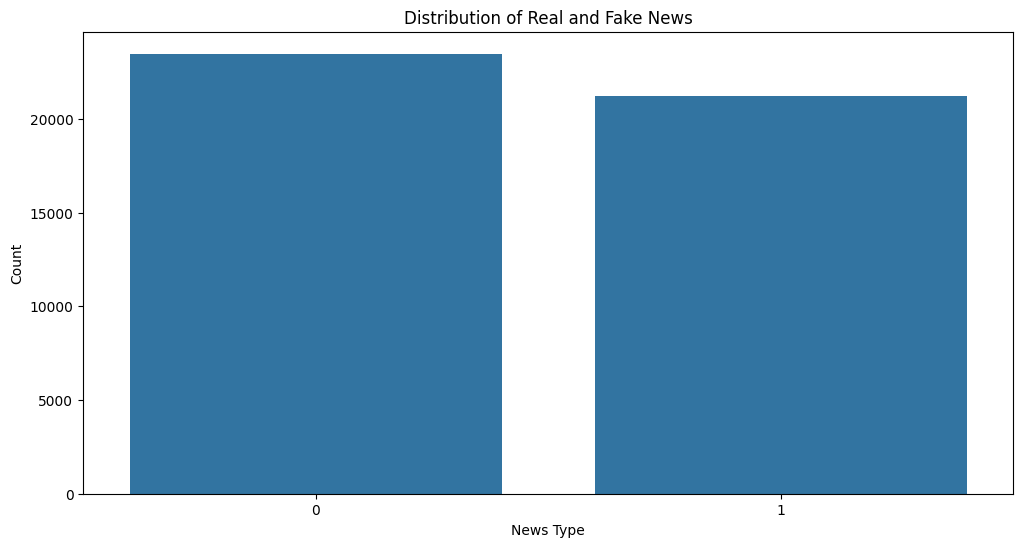

In [235]:
# Visualize the distribution of real and fake news
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=combined_df)
plt.title('Distribution of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

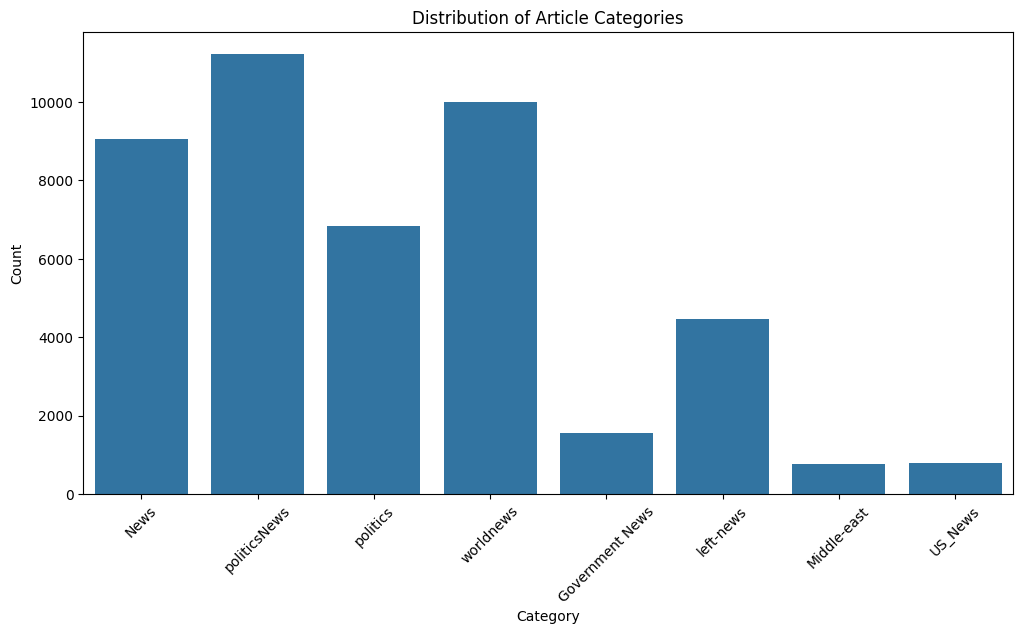

In [236]:
# Visualize the distribution of article categories
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=combined_df)
plt.title('Distribution of Article Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [237]:
# Currently dropping the title, subject, and date columns from the dataFrame - only focusing on the text for model
combined_df.drop(['title', 'subject', 'date'], axis=1, inplace=True)

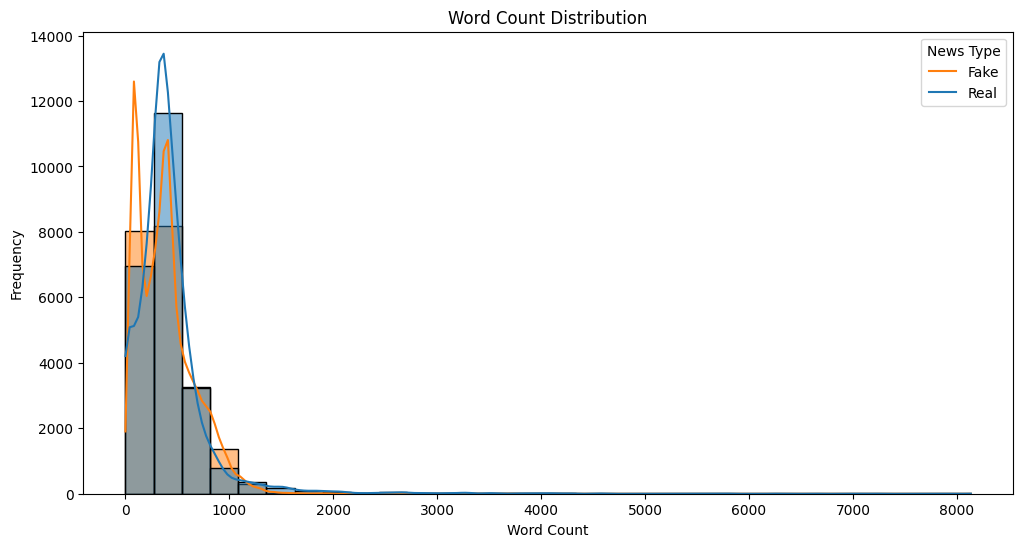

Real News Word Count Statistics:
count    21211.000000
mean       384.757484
std        273.905103
min          0.000000
25%        147.000000
50%        359.000000
75%        523.000000
max       5172.000000
Name: word_count, dtype: float64

Fake News Word Count Statistics:
count    23478.000000
mean       423.224167
std        408.406817
min          0.000000
25%        240.000000
50%        363.000000
75%        506.000000
max       8135.000000
Name: word_count, dtype: float64


In [238]:
# Word Count Analysis
combined_df['word_count'] = combined_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='word_count', hue='label', kde=True, bins=30)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(title='News Type', labels=['Fake', 'Real'])
plt.show()

print("Real News Word Count Statistics:")
print(combined_df[combined_df['label'] == 1]['word_count'].describe())
print("\nFake News Word Count Statistics:")
print(combined_df[combined_df['label'] == 0]['word_count'].describe())

In [239]:
import re

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags and URLs
    text = re.sub(r'<.*?>|https?://\S+|www\.\S+', '', text)

    # Remove text within square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove text within parentheses
    text = re.sub(r'\(.*?\)', '', text)

    # Remove anything that is not a letter or a space
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    
    #Remove words like (the, is, and, are)

    return text

# Apply the preprocessing function to each article text in the DataFrame
combined_df['text'] = combined_df['text'].apply(preprocess_text)

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Perform train-test split
X = combined_df['text']
y = combined_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [241]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [242]:
# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test_tfidf)

In [243]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate metrics for Logistic Regression
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Precision: 0.9813282911841172
Recall: 0.9852871381110584
F1 Score: 0.983303730017762
Accuracy: 0.984224658760349


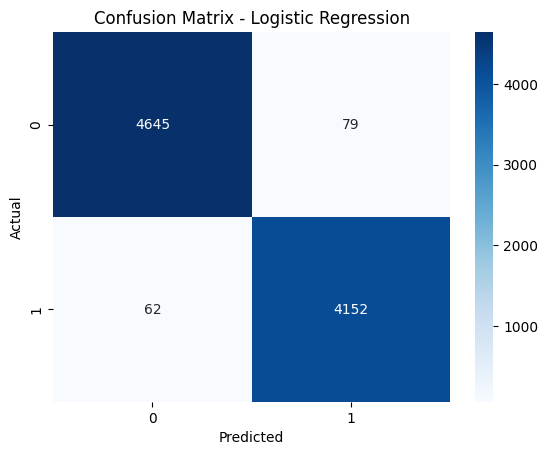

In [244]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [245]:
from sklearn.metrics import roc_auc_score

# Compute ROC AUC score
y_scores = lr_model.predict_proba(X_test_tfidf)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9984509921567035


In [246]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [247]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

In [248]:
# Calculate metrics for Random Forest
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Precision: 0.9787585555817796
Recall: 0.9841006169909824
F1 Score: 0.9814223168855757
Accuracy: 0.9824345491161334


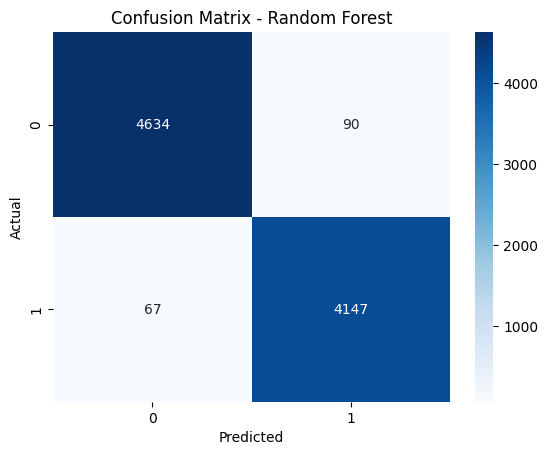

In [249]:
# Compute confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [250]:
# Compute ROC AUC score for Random Forest
y_scores_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]  
roc_auc_rf = roc_auc_score(y_test, y_scores_rf)  
print("ROC AUC Score:", roc_auc_rf)  

ROC AUC Score: 0.9985178783917323


In [251]:
#Gradient Boosting XGBOOST
import xgboost as xgb

# Initialize the Extreme Gradient Boost Model
gb_model = xgb.XGBClassifier()

# Train the model
gb_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [252]:
#Make Predictions on data

y_pred_gb = gb_model.predict(X_test_tfidf)

In [253]:
# Calculate metrics for Extreme Gradient Boosting
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Precision: 0.99146110056926
Recall: 0.9919316563834836
F1 Score: 0.9916963226571768
Accuracy: 0.9921682703065563


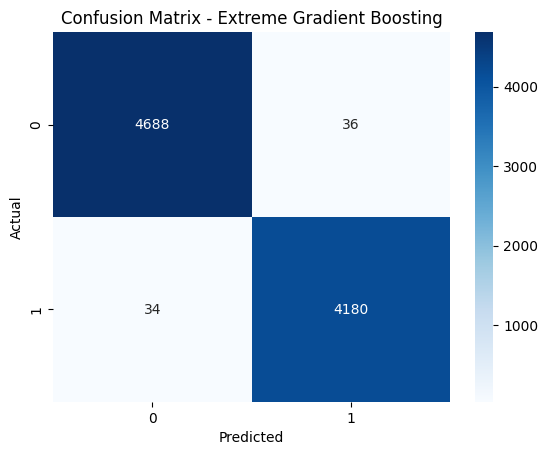

In [254]:
# Compute confusion matrix for Extreme Gradient Boosting
cm = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Extreme Gradient Boosting')
plt.show()

In [255]:
# Compute ROC AUC score for Extreme Gradient Boost
y_scores_gb = gb_model.predict_proba(X_test_tfidf)[:, 1]  
roc_auc_gb = roc_auc_score(y_test, y_scores_gb)  
print("ROC AUC Score:", roc_auc_gb)  

ROC AUC Score: 0.9995382513913744


In [256]:
def predict(text):
    # Preprocess text
    preprocessed = preprocess_text(text)
    
    # Vectorize preprocessed text
    vect_text = tfidf_vectorizer.transform([preprocessed])
    
    # Predict with Logistic Regression
    lr_pred = lr_model.predict(vect_text)
    # Predict with Random Forest
    rf_pred = rf_model.predict(vect_text)
    #Predict with XGB
    gb_pred = gb_model.predict(vect_text)

    
    # Calculate probabilities with Logistic Regression
    lr_prob = lr_model.predict_proba(vect_text)[0]
    # Calculate probabilities with Random Forest
    rf_prob = rf_model.predict_proba(vect_text)[0]
    #Calculate probabilities with XGB
    gb_prob = gb_model.predict_proba(vect_text)[0]
    
    # Print predictions and probabilities for Logistic Regression
    print(f"LR Prediction: {'Real' if lr_pred[0] == 1 else 'Fake'}")
    print(f"LR Probabilities: Real: {lr_prob[1]:.2f}, Fake: {lr_prob[0]:.2f}")
    # Print predictions and probabilities for Random Forest
    print(f"RF Prediction: {'Real' if rf_pred[0] == 1 else 'Fake'}")
    print(f"RF Probabilities: Real: {rf_prob[1]:.2f}, Fake: {rf_prob[0]:.2f}")
    # Print predictions and probabilities for XGB
    print(f"XGB Prediction: {'Real' if gb_pred[0] == 1 else 'Fake'}")
    print(f"XGB Probabilities: Real: {gb_prob[1]:.2f}, Fake: {gb_prob[0]:.2f}")


    #bar chart

    models = [" Logistic Regression", "Random Forest", "XGBoost"]
    

    prob_real = [lr_prob[1],rf_prob[1], gb_prob[1]]
    prob_fake = [lr_prob[0],rf_prob[0], gb_prob[0]]
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(models))

    bar1 = ax.bar(index, prob_real, bar_width, label='Real', color = 'blue')
    
    bar2 = ax.bar(index + bar_width, prob_fake, bar_width, label='Fake', color = 'red')

    #labels
    ax.set_title('Probability of Authenticity')
    ax.set_xlabel('Model')
    ax.set_ylabel(' Probability')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

   

    plt.show()


LR Prediction: Real
LR Probabilities: Real: 0.66, Fake: 0.34
RF Prediction: Real
RF Probabilities: Real: 0.69, Fake: 0.31
XGB Prediction: Real
XGB Probabilities: Real: 0.98, Fake: 0.02


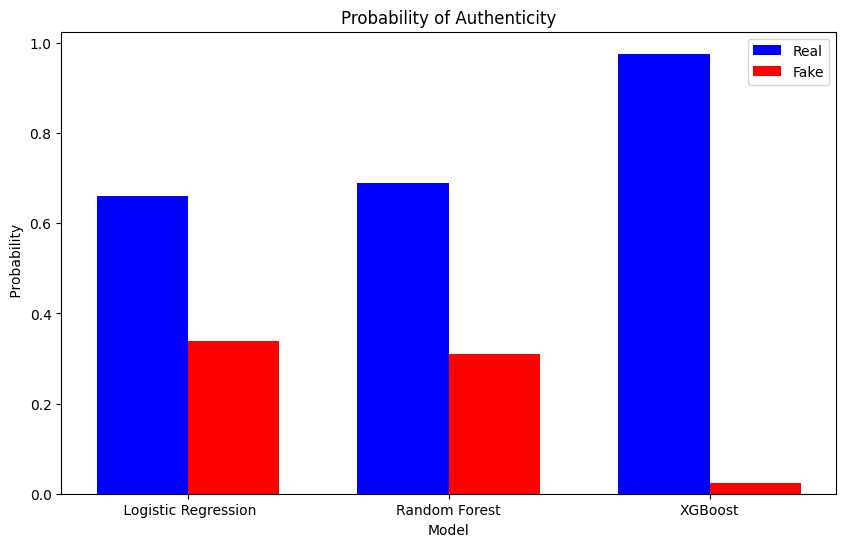

In [257]:
# Real news article example test
# Source: https://www.cnn.com/2024/03/19/politics/supreme-court-allows-texas-to-begin-enforcing-controversial-immigration-law/index.html

text_1 = """

The Supreme Court on Tuesday cleared the way for Texas to immediately begin enforcing a controversial immigration law that allows state officials to arrest and detain people they suspect of entering the country illegally.

The court's three liberals dissented.

Legal challenges to the law are ongoing at a federal appeals court, but the decision hands a significant yet temporary win to Texas, which has been battling the Biden administration over immigration policy.

The court had been blocking the law from taking effect, issuing an indefinite pause on the proceedings a day earlier, which was wiped away by Tuesday's order.

Senate Bill 4, signed into law by Republican Gov. Greg Abbott in December, makes entering Texas illegally a state crime and allows state judges to order immigrants to be deported. Immigration enforcement, generally, is a function of the federal government.

The law immediately raised concerns among immigration advocates of increased racial profiling as well as detentions and attempted deportations by state authorities in Texas, where Latinos represent 40 percent of the population.
"""

predict(text_1)

LR Prediction: Fake
LR Probabilities: Real: 0.07, Fake: 0.93
RF Prediction: Fake
RF Probabilities: Real: 0.41, Fake: 0.59
XGB Prediction: Fake
XGB Probabilities: Real: 0.00, Fake: 1.00


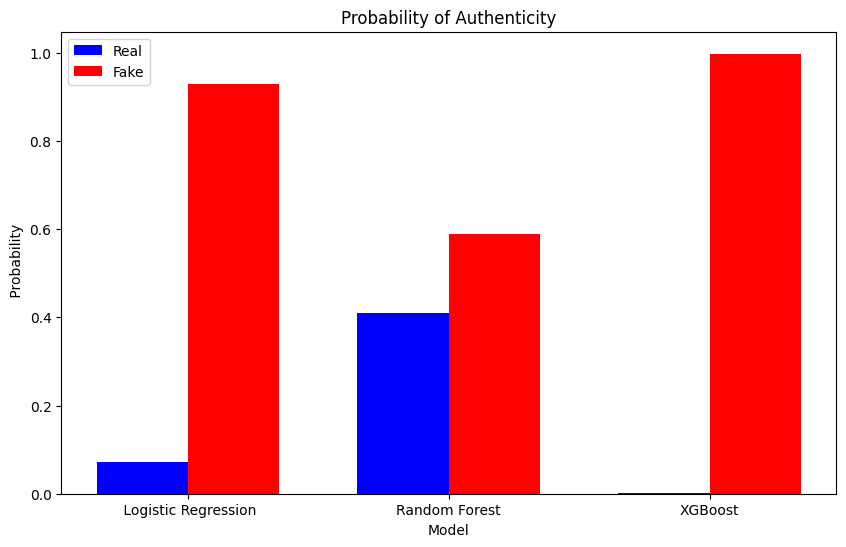

In [258]:
# Fake news article example test

text_2 = """
In a groundbreaking announcement that has shocked the global community, researchers from the International Space Agency (ISA) have confirmed what has long been a subject of folklore and whimsy: the moon is, in fact, made of cheese. This astonishing revelation comes after decades of speculation and myth, turning what was once a fanciful idea into undeniable fact.

The ISA, a consortium of space agencies from over 60 countries, shared their findings at a press conference held at their headquarters in Geneva. According to Dr. Helena Fontaine, the chief of lunar research at the ISA, recent samples collected from the moon's surface during the highly secretive "Apollo 20" mission reveal that the moon is predominantly composed of a substance strikingly similar to aged Gouda.

"Through extensive analysis, we have discovered that the moon's surface is not made of rock, but rather a dense form of cheese that closely resembles Gouda in both taste and texture," Dr. Fontaine explained. "This discovery not only challenges our understanding of the moon but also opens up new avenues for the dairy industry."
"""

predict(text_2)

LR Prediction: Fake
LR Probabilities: Real: 0.27, Fake: 0.73
RF Prediction: Fake
RF Probabilities: Real: 0.30, Fake: 0.70
XGB Prediction: Fake
XGB Probabilities: Real: 0.47, Fake: 0.53


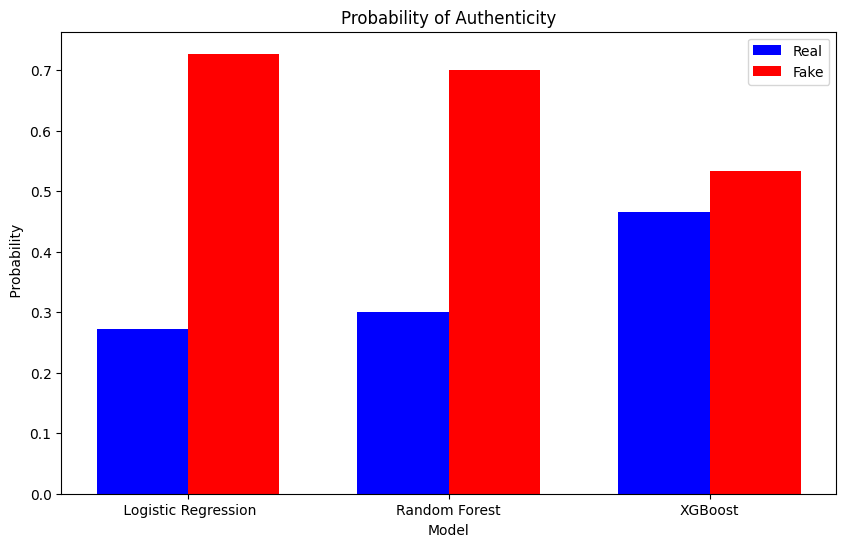

In [259]:
# Random Example
text_3 = """
In the velvet expanse of Fortnite's nebulous arena, pixelated ducks orchestrated a ballet amidst the cascading jellybeans, dodging the gentle barrage of whispered marshmallows. 

Beneath the incandescent glow of a cubic sun, towers of spaghetti sprouted wings, embarking on a quest to serenade the moon with tales of heroic sandwiches, valiantly battling the tyranny of soggy toast. 

As shadows pirouetted on the edge of reality, a chorus of invisible llamas recited epic sonnets, chronicling the saga of levitating sneakers, engaged in a perpetual duel with the specter of ephemeral pickaxes. 

Within the labyrinthine heart of the island, echoes of a digital sea whispered secrets to ancient refrigerators, plotting the renaissance of pixelated artistry in a symphony of kaleidoscopic turbans.
"""

predict(text_3)

LR Prediction: Fake
LR Probabilities: Real: 0.20, Fake: 0.80
RF Prediction: Fake
RF Probabilities: Real: 0.42, Fake: 0.58
XGB Prediction: Fake
XGB Probabilities: Real: 0.16, Fake: 0.84


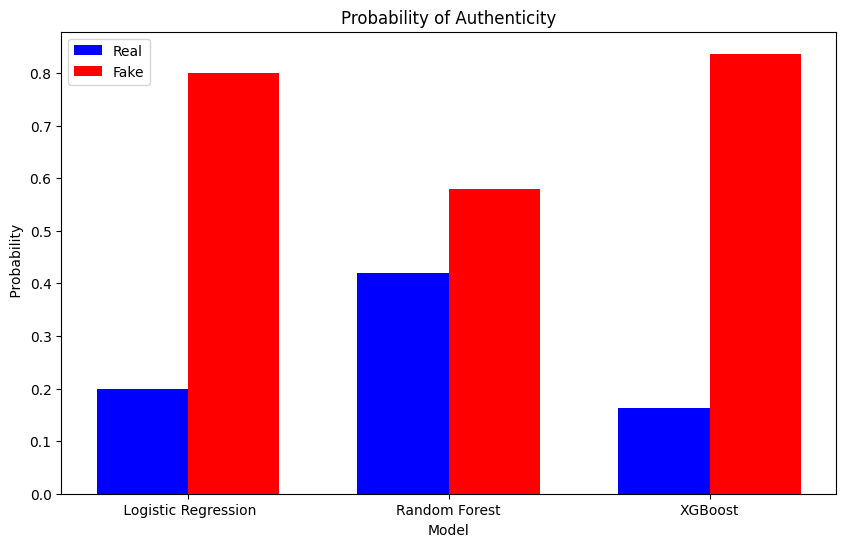

In [260]:
# Fake news GPT 3 Generation
text_4 = """
In a recent study published in the esteemed Journal of Virology, researchers from the renowned Institute of Extraterrestrial Studies (IES) have delved into an intriguing possibility: could there be a connection between the common cold and extraterrestrial life?

Led by Dr. Emily Chang, a respected virologist at the forefront of interstellar research, the team embarked on an ambitious project to analyze the genetic makeup of various strains of the common cold virus. Their goal was to uncover any potential links to microbial organisms found in meteorite samples collected from outer space.

After months of meticulous analysis, the researchers made a compelling discovery. Certain genetic sequences within the common cold virus bore striking similarities to microbial DNA extracted from meteorite samples. While the findings are preliminary, they suggest a tantalizing possibility: some strains of the common cold may have origins beyond Earth.
"""
predict(text_4)

LR Prediction: Fake
LR Probabilities: Real: 0.20, Fake: 0.80
RF Prediction: Fake
RF Probabilities: Real: 0.41, Fake: 0.59
XGB Prediction: Fake
XGB Probabilities: Real: 0.11, Fake: 0.89


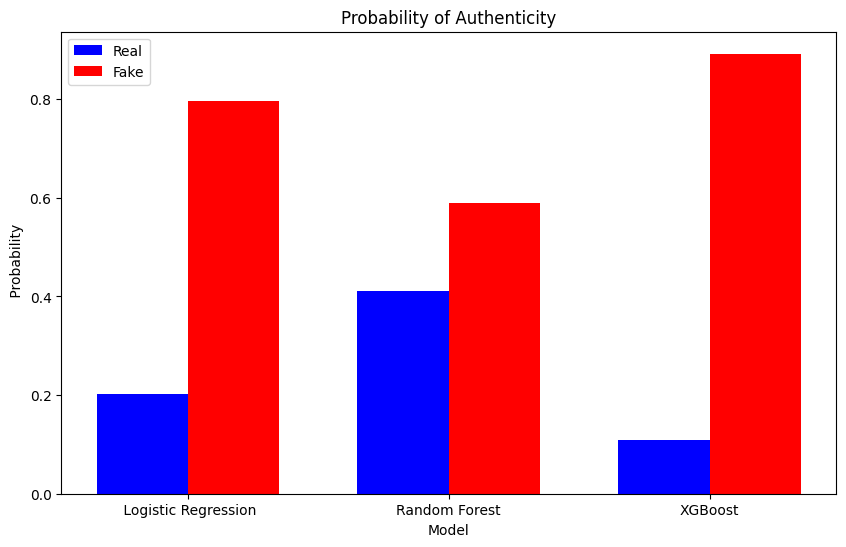

In [261]:
# Fake medical news from GPT 3
#source-
text_5 = """
In a surprising turn of events, medical professionals across urban areas are reporting a sharp rise in headache cases, prompting concern among public health officials. The sudden surge in headaches has left experts scrambling for answers and has sparked a wave of speculation about potential causes.
According to Dr. Emily Watson, a neurologist at City General Hospital, "We've seen a significant uptick in patients presenting with severe headaches over the past few weeks. Many of these cases are more intense and persistent than what we typically encounter."
While the exact cause of this headache epidemic remains unclear, some experts are pointing fingers at environmental factors such as air pollution and electromagnetic radiation from electronic devices. Dr. Watson warns, "We know that exposure to certain pollutants and electromagnetic fields can have adverse effects on health, including headaches. It's possible that these factors are contributing to the current situation."
However, not all medical professionals agree on the potential causes. Dr. Michael Johnson, a leading researcher in headache disorders, suggests that stress and lifestyle factors may play a significant role. "In today's fast-paced world, many people are under immense stress, which can trigger headaches. Additionally, factors such as poor sleep, dehydration, and excessive screen time can all contribute to headaches," Dr. Johnson explains.
"""
predict(text_5)

LR Prediction: Real
LR Probabilities: Real: 0.83, Fake: 0.17
RF Prediction: Real
RF Probabilities: Real: 0.77, Fake: 0.23
XGB Prediction: Real
XGB Probabilities: Real: 1.00, Fake: 0.00


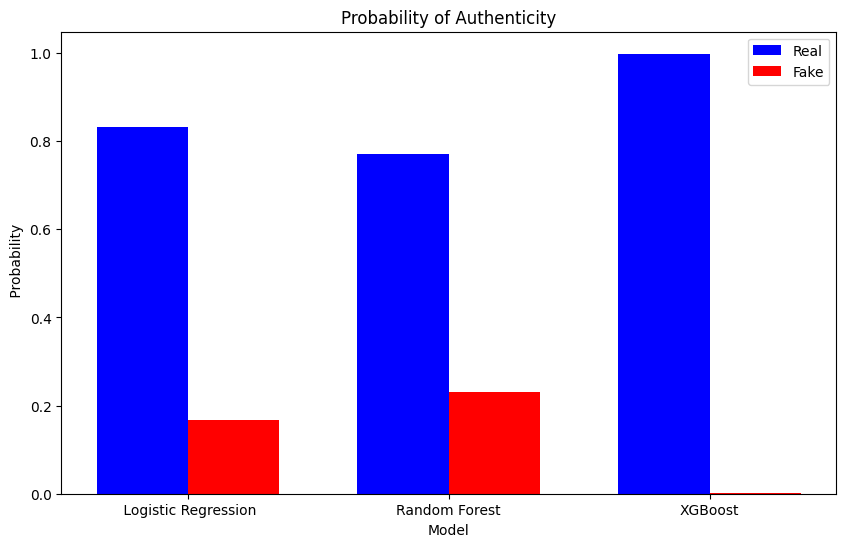

In [262]:
# Reuters Test
text_6= """
CHICAGO, April 11 (Reuters) - Dairy farmers in the United States are raising their defenses to try to contain the spread of bird flu: banning visitors, cutting down trees to discourage wild birds from landing, and disinfecting vehicles coming onto their land.
South Dakota on Thursday became the eighth state to find highly pathogenic avian influenza (HPAI) in a dairy herd, after the U.S. Department of Agriculture reported infections in North Carolina, Texas, Kansas, Ohio, Michigan, Idaho and New Mexico.
While the first cases appear to have been introduced to herds in Texas and Kansas by wild birds, the USDA said transmission among cattle was also possible. Agricultural officials in Michigan and Ohio said infected herds in those states received cattle from Texas.
Reuters spoke to seven dairy farmers in five states who said they are reinforcing safety and cleaning procedures, with three producers exceeding government recommendations.
"""

predict(text_6)